<a href="https://colab.research.google.com/github/Shashidhar-Gowda/ChatBot/blob/mlds/intent%2Btools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q langchain groq pandas fuzzywuzzy python-Levenshtein


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.3 MB/s eta 0:00:00


In [3]:
pip install -qU "langchain[groq]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.3/423.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.8 MB/s eta 0:00:00


In [4]:
import os
import pandas as pd
from fuzzywuzzy import process
from langchain_groq import ChatGroq
from langchain.agents import initialize_agent, Tool, AgentType
from langchain.tools import Tool

In [5]:
df = pd.read_csv("/content/assignment_data.csv")
original_columns = df.columns.tolist()

In [6]:
df.head()

,report_date,orders_all_np,AffiliatesAll_spend,DisplayAll_spend,SEMConversionXX_spend,SEMConversionOther_spend,SocialEngagement_spend,SocialConversion_spend,VideoEngagement_spend,VideoConversion_spend,...,gcr_per_order_overall_dom_marketplace_avg_7d,gcr_per_order_overall_o365_avg_7d,brand_tracker_gen_pop_describes_xxxx_aligns_values_lag_2qtr,brand_tracker_gen_pop_unaided_awareness_domains_web_hosting_lag_1qtr,brand_tracker_gen_pop_describes_xxxx_brand_trust_lag_1qtr,brand_tracker_gen_pop_describes_xxxx_proud_to_use_lag_1qtr,brand_tracker_gen_pop_describes_xxxx_aligns_values_lag_3qtr,brand_tracker_gen_pop_aided_awareness_lag_1qtr,cli,market_share_xxxx_net_adds_total_pct
0,2021-01-01,1508,1938.294,3729.40819,2687.70,12485.57,0.0000,2628.82000,1378.75940,1180.76030,...,187.417844,40.020706,0.222222,0.439831,0.248000,0.256140,0.222222,0.741525,101.0638,47.4
1,2021-01-02,1743,2313.849,4240.90397,3204.85,15453.41,0.0000,2823.77000,1298.30520,1285.34401,...,176.172436,40.392106,0.222254,0.440062,0.247722,0.256110,0.222210,0.741461,101.0638,51.1
2,2021-01-03,1762,1920.731,4608.84961,3048.14,15460.04,0.0000,2612.67000,1308.46837,1301.00213,...,263.483150,41.031695,0.222285,0.440287,0.247441,0.256080,0.222197,0.741401,101.0638,46.0
3,2021-01-04,2544,2701.538,4779.59883,4239.07,18099.52,0.0000,2766.35002,1276.38484,1299.09685,...,308.823150,42.428337,0.222317,0.440507,0.247155,0.256050,0.222185,0.741344,101.0638,45.8
4,2021-01-05,2542,2484.481,4680.10428,4330.80,18091.61,64.5375,2729.21398,1211.32759,1240.63956,...,430.285238,42.749525,0.222348,0.440721,0.246866,0.256021,0.222172,0.741292,101.0638,44.2


In [7]:
os.environ["GROQ_API_KEY"] = "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"

In [8]:
llm = ChatGroq(
    temperature=0,
    model_name="deepseek-r1-distill-llama-70b",
)

In [9]:
def search_column_names(query: str, df: pd.DataFrame, threshold=70):
    col_names = [col.lower().replace("_", " ") for col in df.columns]
    matches = process.extract(query.lower(), col_names, limit=2)
    return [df.columns[col_names.index(match[0])] for match in matches if match[1] >= threshold]

In [10]:
!pip install -q pandas fuzzywuzzy python-Levenshtein matplotlib seaborn


In [11]:
import re
import pandas as pd
from fuzzywuzzy import process
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [12]:
df = pd.read_csv("/content/assignment_data.csv")

In [13]:
intents = {
    "correlation_analysis": [
        r'\bcorrelation\b', r'\bcorrelate\b', r'\bpearson\b', r'\bspearman\b',
        r'\brelationship\b', r'\bassociation\b', r'\brelation\b'
    ],
    "visualization": [
        r'\bvisualize\b', r'\bchart\b', r'\bplot\b', r'\bgraph\b',
        r'\bline plot\b', r'\bhistogram\b', r'\bscatter\b', r'\bvisualization\b'
    ],
    "preprocessing": [
        r'\bclean\b', r'\bmissing values\b', r'\bnulls\b', r'\bpreprocess\b',
        r'\bstandardize\b', r'\bnormalize\b', r'\bremove duplicates\b'
    ],
    "greetings": [r'\bhi\b', r'\bhey\b', r'\bhello\b', r'\bhola\b']
}

In [14]:
def classify_intent(user_input):
    for intent, patterns in intents.items():
        for pattern in patterns:
            if re.search(pattern, user_input, re.IGNORECASE):
                return intent
    return "unknown"

In [15]:
def fuzzy_column_search(query, df, threshold=70):
    query_words = re.findall(r'\w+', query.lower())
    col_names = [col.lower().replace('_', ' ') for col in df.columns]
    matched = []
    for word in query_words:
        matches = process.extract(word, col_names)
        for match, score in matches:
            if score >= threshold and match not in matched:
                matched.append(df.columns[col_names.index(match)])
    return list(set(matched))

In [16]:
def correlation_tool(df, col1, col2):
    x, y = df[col1], df[col2]
    pearson_corr, _ = pearsonr(x, y)
    spearman_corr, _ = spearmanr(x, y)
    return {
        "columns": (col1, col2),
        "pearson": round(pearson_corr, 4),
        "spearman": round(spearman_corr, 4)
    }

def visualization_tool(df, cols):
    for col in cols:
        if pd.api.types.is_numeric_dtype(df[col]):
            sns.histplot(df[col], kde=True)
            plt.title(f"Distribution of {col}")
            plt.show()

def preprocessing_tool(df):
    cleaned_df = df.drop_duplicates().dropna()
    print("✅ Preprocessing done. Removed nulls and duplicates.")
    return cleaned_df

In [17]:
def chatbot_engine(user_input):
    intent = classify_intent(user_input)
    matched_cols = fuzzy_column_search(user_input, df)

    print(f"🧠 Detected Intent: {intent}")
    print(f"🗂️ Matched Columns: {matched_cols}")

    if intent == "correlation_analysis" and len(matched_cols) >= 2:
        result = correlation_tool(df, matched_cols[0], matched_cols[1])
        print("📊 Correlation Analysis Result:")
        print(result)

    elif intent == "visualization" and len(matched_cols) >= 1:
        print("📈 Generating visualizations...")
        visualization_tool(df, matched_cols)

    elif intent == "preprocessing":
        df_cleaned = preprocessing_tool(df)
        print("🧼 Cleaned dataset shape:", df_cleaned.shape)

    elif intent == "greetings":
        print("👋 Hey there! How can I help you with your data today?")

    else:
        print("🤔 I couldn't understand your intent. Try rephrasing!")


🧠 Detected Intent: visualization
🗂️ Matched Columns: ['SEMConversionXX_spend', 'VideoConversionPMAX_spend', 'SocialConversion_spend', 'SEMConversionOther_spend', 'VideoConversion_spend', 'orders_all_np']
📈 Generating visualizations...


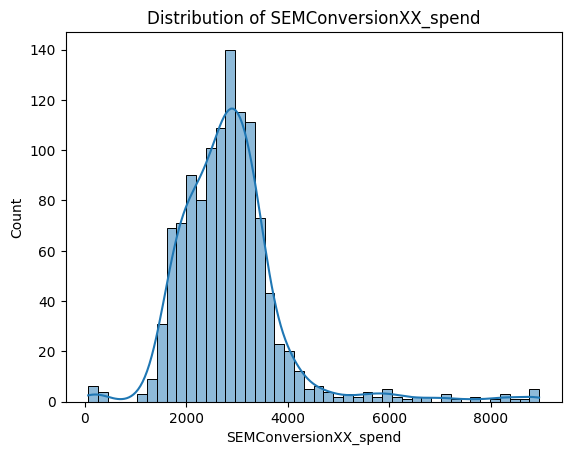

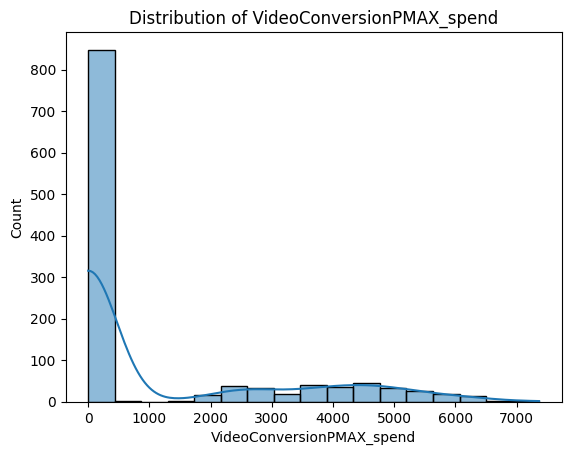

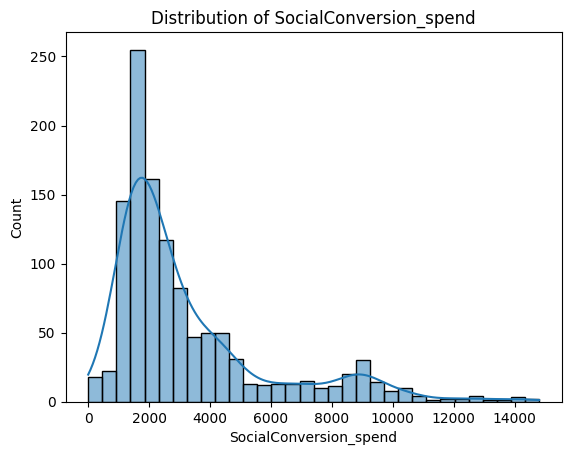

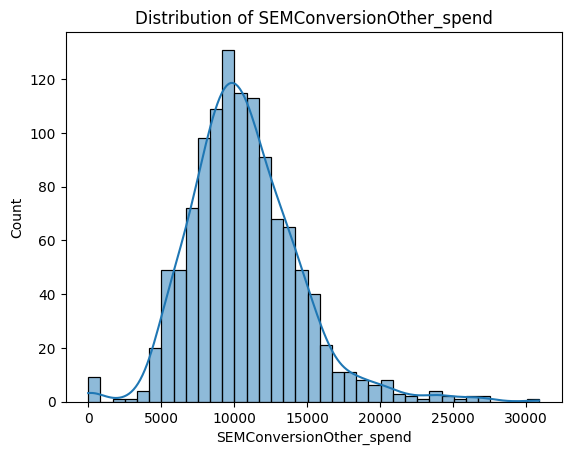

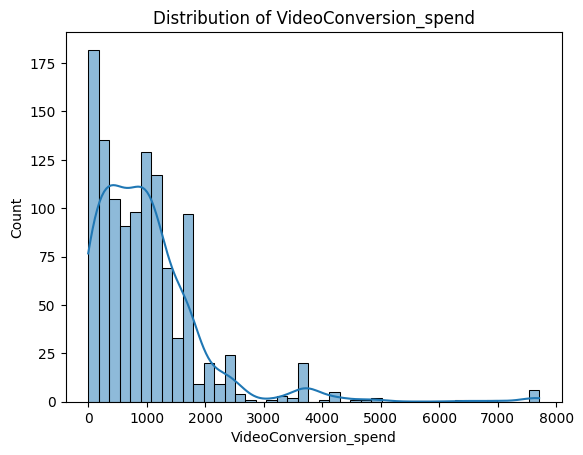

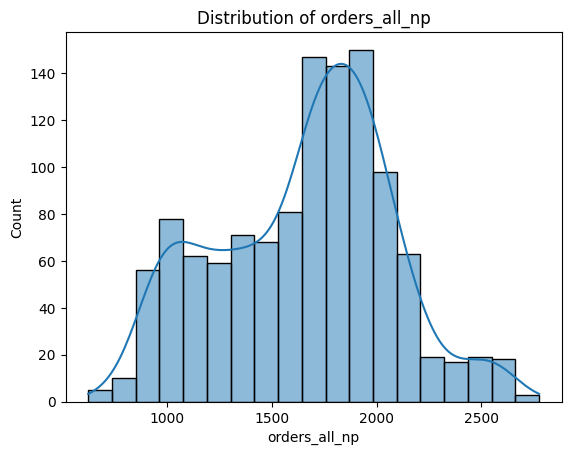

In [19]:
user_input = "Can you show me the chart between orders_all_np and SEMConversionXX_spend?"
chatbot_engine(user_input)